In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
%matplotlib inline

In [46]:
data=pd.read_csv("C:\\Users\\ujwala\\Downloads\\book.csv")

In [47]:
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
5,6,276744,The Kitchen God's Wife,7
6,7,276745,What If?: The World's Foremost Military Histor...,10
7,8,276747,PLEADING GUILTY,9
8,9,276747,Under the Black Flag: The Romance and the Real...,9
9,10,276747,Where You'll Find Me: And Other Stories,8


In [48]:
print(data.shape)
print(list(data.columns))

(10000, 4)
['Unnamed: 0', 'User.ID', 'Book.Title', 'Book.Rating']


In [49]:
data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [50]:
data.rename(columns={'Unnamed: 0':'ID'}, inplace=True )
data.rename(columns={'Book.Title':'Title'}, inplace = True)
data.rename(columns={'User.ID':'User'}, inplace = True)
data.rename(columns={'Book.Rating':'Rating'}, inplace = True)

In [51]:
data.shape

(10000, 4)

In [52]:
num_ratings = data['Rating'].count()
num_users = data['ID'].nunique()
num_books = data['Title'].nunique()

pd.DataFrame([['# of Ratings', num_ratings],
            ['# of Users', num_users],
            ['# of Books', num_books]],
            columns = ['Characteristic', 'Count'])

,Characteristic,Count
0,# of Ratings,10000
1,# of Users,10000
2,# of Books,9659


# EDA

In [53]:
data.describe()

,ID,User,Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [54]:
data['Rating'].describe()


count    10000.00000
mean         7.56630
std          1.82152
min          1.00000
25%          7.00000
50%          8.00000
75%          9.00000
max         10.00000
Name: Rating, dtype: float64

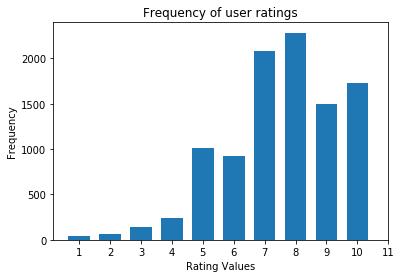

In [55]:
data = data['Rating']
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

plt.hist(data, bins, align="left", rwidth = 0.7)
plt.xticks(bins)
plt.xlabel('Rating Values')
plt.ylabel('Frequency')
plt.title('Frequency of user ratings')
plt.show()

In [28]:
data

0        5
1        3
2        6
3        8
4        6
5        7
6       10
7        9
8        9
9        8
10       7
11       7
12       6
13       8
14       8
15       5
16      10
17       5
18       8
19       3
20       4
21       4
22       7
23      10
24      10
25       9
26       7
27       7
28       6
29       8
        ..
9970     5
9971     8
9972     6
9973     5
9974     7
9975     9
9976     7
9977     6
9978     5
9979     5
9980     9
9981     9
9982     9
9983     8
9984     8
9985     8
9986     7
9987     7
9988    10
9989     8
9990     7
9991     5
9992     8
9993     8
9994     8
9995     7
9996     9
9997     7
9998     8
9999     6
Name: Rating, Length: 10000, dtype: int64

In [68]:
data['Title']

KeyError: 'Title'

In [67]:
# calculating the word count for book description
data['word_count'] = data['Title'].apply(lambda x: len(str(x).split()))
data['word_count'].plot(kind = 'hist',bins = 50)
plt.title ('Word Count distribution for Book Title')
plt.show()

KeyError: 'Title'